In [1]:
print(' Author : Yagnik Maheshbhai Poshiya \n Student ID : 20CE114 (20ce114@charusat.edu.in) \n Computer Engineering \n Chandubhai S. Patel Institute Of Technology, CHARUSAT, ANAND, GUJARAT.')
print(' Author : Nirmi Patel \n Student ID : 20CE114 (20ce095@charusat.edu.in) \n Computer Engineering \n Chandubhai S. Patel Institute Of Technology, CHARUSAT, ANAND, GUJARAT.')
print(' Author : Sapnil Patel \n Student ID : 20CE114 (20ce103@charusat.edu.in) \n Computer Engineering \n Chandubhai S. Patel Institute Of Technology, CHARUSAT, ANAND, GUJARAT.')

 Author : Yagnik Maheshbhai Poshiya 
 Student ID : 20CE114 (20ce114@charusat.edu.in) 
 Computer Engineering 
 Chandubhai S. Patel Institute Of Technology, CHARUSAT, ANAND, GUJARAT.
 Author : Nirmi Patel 
 Student ID : 20CE114 (20ce095@charusat.edu.in) 
 Computer Engineering 
 Chandubhai S. Patel Institute Of Technology, CHARUSAT, ANAND, GUJARAT.
 Author : Sapnil Patel 
 Student ID : 20CE114 (20ce103@charusat.edu.in) 
 Computer Engineering 
 Chandubhai S. Patel Institute Of Technology, CHARUSAT, ANAND, GUJARAT.


# Dataset Description

> Dataset Name : Wisconsin Diagnostic Breast Cancer Dataset - Original
[Source](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original))




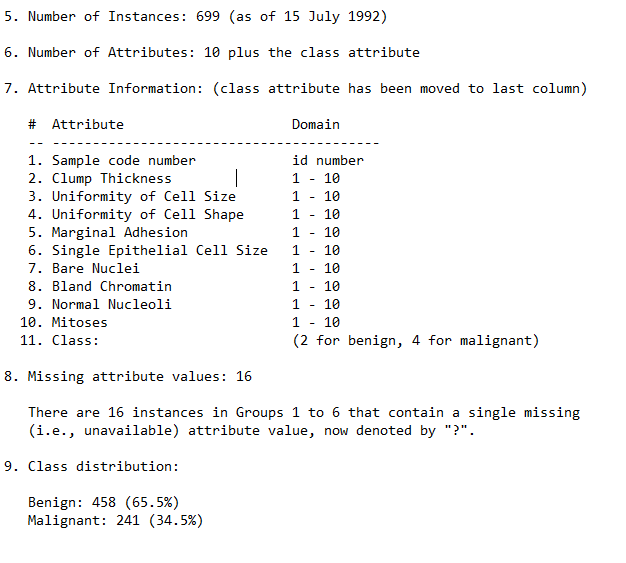

# Data Loading

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
DataFrame = pd.read_csv('/content/drive/MyDrive/BCD Structured Format/AttemptedDataset/WisconsinDiagnosticBreastCancer-Original/WDBC-ORIGINAL.csv')

In [ ]:
DataFrame.head()

# Data Pre-processing 

In [ ]:
DataFrame.info()

> Bare Nuclei contains some missing values but instead of nan types of values it contains '?' that is why here you can see dtype of Bare Nuclei is 'object'. So if you observe | in dataset description it is given that range of values of attributes ['Bare Nuclei'] is 1-10 then now use random library to generate any number between 1-10.

In [ ]:
# Here due to some reasons value replacement is not working
import random
randomGeneratedNumber = random.randint(1,10)
DataFrame['Bare Nuclei'] = DataFrame['Bare Nuclei'].replace(['?'],randomGeneratedNumber)
print(randomGeneratedNumber)

In [ ]:
# Here conversion of column from object type to int type
# But question is there if by which values system replace object type
DataFrame['Bare Nuclei'] = DataFrame['Bare Nuclei'].astype(str).astype(int)

In [ ]:
DataFrame.info()

# Nan Value Checking

In [ ]:
DataFrame.isna().sum()

# Counting Benign and Malignant Cases
> 2 for Benign Cases - 4 for Malignant Cases

In [ ]:
DataFrame['Class'].value_counts()

In [ ]:
sns.countplot(DataFrame['Class'],label='Count')

# Finding Corelation

In [ ]:
DataFrame.iloc[:,1:10].corr()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(DataFrame.iloc[:,1:10].corr(), annot=True, fmt='.0%')

# Spliting Dataset Into Training set and Testing set

In [ ]:
# Spilting Dataset into input(X) and output(Y)
X = DataFrame.iloc[:,1:10].values
Y = DataFrame.iloc[:,10].values
print(X)
print(Y)

In [ ]:
# spliting Dataset into training and testing based on input(X) and output(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

 # Applying Standard Scaler Process On Data

In [ ]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.fit_transform(X_test)
print(X_train)
print(X_test)

# Applying Various Models On Training set

In [ ]:
# defining function to try various models on dataset
def TestableModels(X_train, Y_train):
  # Logistic Regression Model
  from sklearn.linear_model import LogisticRegression
  LR = LogisticRegression(random_state=0)
  LR.fit(X_train, Y_train)

  # Decision Tree Model
  from sklearn.tree import DecisionTreeClassifier
  Tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
  Tree.fit(X_train, Y_train)

  # Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  RFC = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  RFC.fit(X_train, Y_train)
  
  # Support Vector Machine 
  from sklearn import svm
  SupportVectorClassifier = svm.SVC()
  SupportVectorClassifier.fit(X_train, Y_train)

  # Multilayer Perceptron
  from sklearn.neural_network import MLPClassifier
  MultilayerPerceptron = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(5,2), random_state=1)
  MultilayerPerceptron.fit(X_train, Y_train)

   # Printing accuracy of model on training data
  print('[0] Logistic Regression Training Accuracy : ', LR.score(X_train, Y_train))
  print('[1] Decision Tree Training Accuracy : ', Tree.score(X_train, Y_train))
  print('[2] Random Forest Training Accuracy : ', RFC.score(X_train, Y_train))
  print('[3] Support Vector Machine Training Accuracy : ', SupportVectorClassifier.score(X_train, Y_train))
  print('[4] Multilayer Perceptron Training Accuracy : ', MultilayerPerceptron.score(X_train, Y_train))

  # returning values of LR, Tree and RFC
  return LR,Tree,RFC,SupportVectorClassifier,MultilayerPerceptron

In [ ]:
model = TestableModels(X_train, Y_train)

# Generating Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
for iterVar_One in range(len(model)):
  ConfusionMatrix = confusion_matrix(Y_test, model[iterVar_One].predict(X_test))
  TruePositive = ConfusionMatrix[0][0]
  TrueNegative = ConfusionMatrix[1][1]
  FalsePositive = ConfusionMatrix[0][1]
  FalseNegative = ConfusionMatrix[1][0]
  print('-------------> Confusion Matrix : ',TruePositive, TrueNegative, FalseNegative, FalsePositive)
  print([iterVar_One],'Testing Accuracy Of Model ',[iterVar_One],(TruePositive+TrueNegative)/(TruePositive+TrueNegative+FalsePositive+FalseNegative))

# Generating Classification Report

In [ ]:
# getting classification report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for iterVar_Two in range(len(model)):
  print('---------Model---------',iterVar_Two)
  print(classification_report(Y_test,model[iterVar_Two].predict(X_test)))
  print(accuracy_score(Y_test,model[iterVar_Two].predict(X_test)))
  print('\n')

# Comparing Predicted Values

In [ ]:
# Now to see predicted values of any of model (Here i have taken random forest classifier)
PredictionValues = model[4].predict(X_test)
print(PredictionValues)
print('\n\n\n',Y_test)

# After Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array(X_train)
y = np.array(Y_train)
kf = KFold(n_splits=5)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [ ]:
models_name = ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine','Multilayer Perceptron']

In [ ]:
for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    CV_score_LR = cross_val_score(LogisticRegression(random_state=0), X_train, y_train, cv=3)
    print('[0] Logistic Regression CV Score------>',CV_score_LR)
    print('   Average CV Score------>',np.average(CV_score_LR))

    CV_score_DT = cross_val_score(DecisionTreeClassifier(criterion='entropy', random_state=0), X_train, y_train, cv=3)
    print('[1] Decision Tree CV Score------>',CV_score_DT)
    print('   Average CV Score------>',np.average(CV_score_DT))

    CV_score_RF = cross_val_score(RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0), X_train, y_train, cv=3)
    print('[2] Random Forest CV Score------>',CV_score_RF)
    print('   Average CV Score------>',np.average(CV_score_RF))

    CV_score_SVM = cross_val_score(svm.SVC(), X_train, y_train, cv=3)
    print('[3] Support Vector Machine CV Score------>',CV_score_SVM)
    print('   Average CV Score------>',np.average(CV_score_SVM))

    CV_score_MLP = cross_val_score(MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(5,2), random_state=1), X_train, y_train, cv=3)
    print('[4] Multilayer Perceptron CV Score------>',CV_score_MLP)
    print('   Average CV Score------>',np.average(CV_score_MLP))

    print('\n------------------------------------------------------------------------------------------\n')